In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import zscore
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.metrics import accuracy_score
import warnings
warnings.filterwarnings('ignore')

In [2]:
#loading the CSV data files
df=pd.read_csv('HR-Employee-Attrition.csv')

In [3]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [4]:
df.shape

(1470, 35)

In [5]:
#checking for the null values
df.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

In [6]:
df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [7]:
#checking the skewness in the data
df.skew()

Age                         0.413286
DailyRate                  -0.003519
DistanceFromHome            0.958118
Education                  -0.289681
EmployeeCount               0.000000
EmployeeNumber              0.016574
EnvironmentSatisfaction    -0.321654
HourlyRate                 -0.032311
JobInvolvement             -0.498419
JobLevel                    1.025401
JobSatisfaction            -0.329672
MonthlyIncome               1.369817
MonthlyRate                 0.018578
NumCompaniesWorked          1.026471
PercentSalaryHike           0.821128
PerformanceRating           1.921883
RelationshipSatisfaction   -0.302828
StandardHours               0.000000
StockOptionLevel            0.968980
TotalWorkingYears           1.117172
TrainingTimesLastYear       0.553124
WorkLifeBalance            -0.552480
YearsAtCompany              1.764529
YearsInCurrentRole          0.917363
YearsSinceLastPromotion     1.984290
YearsWithCurrManager        0.833451
dtype: float64

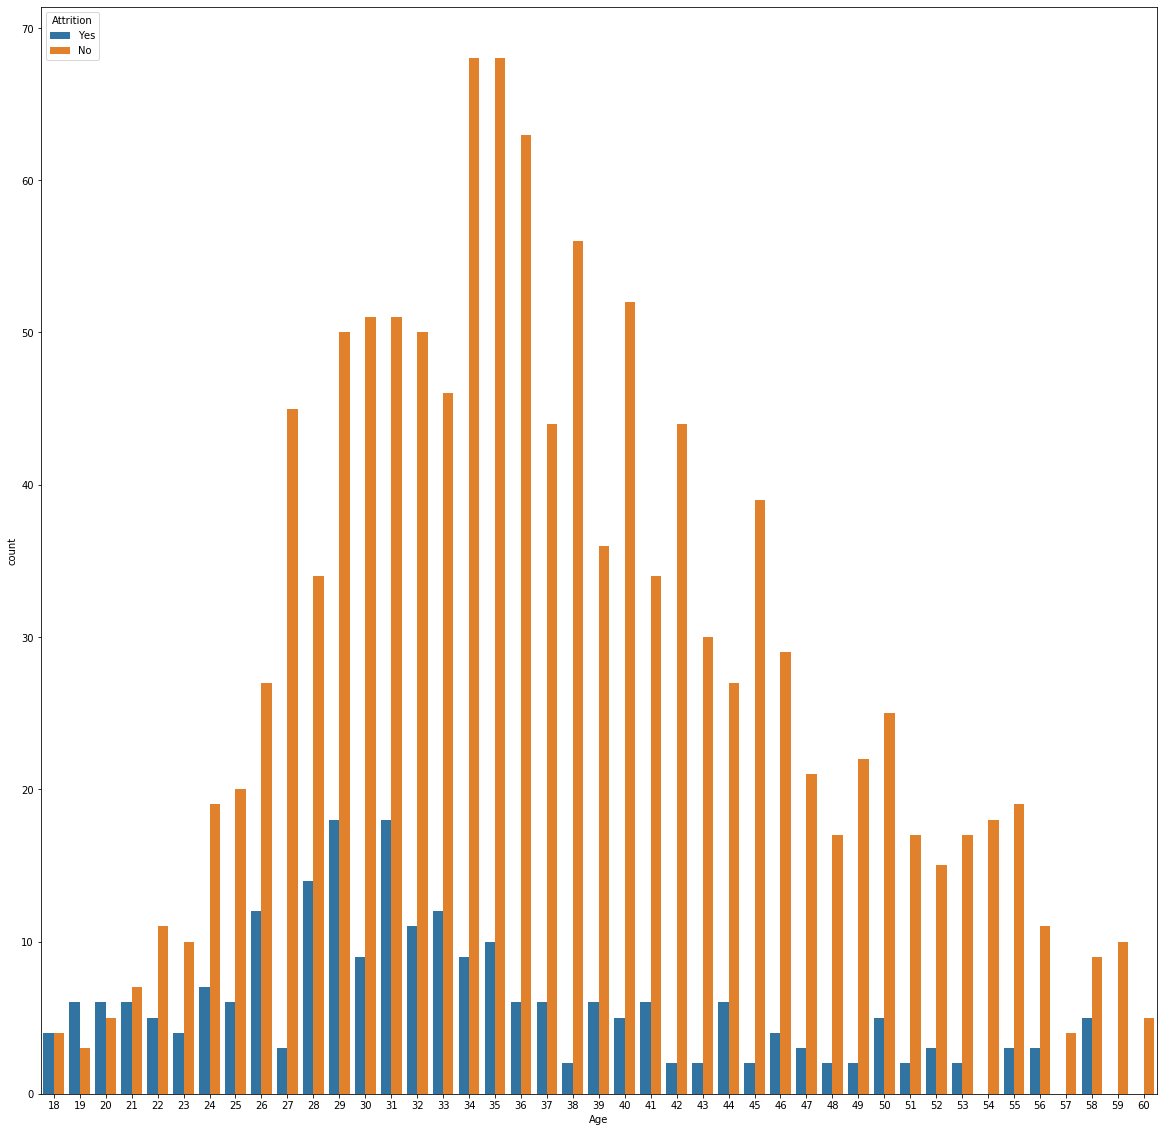

In [8]:
#visualizing the attrition with respect to age
fig,axes=plt.subplots(figsize=(20,20))
sns.countplot(x='Age',hue='Attrition',data=df)

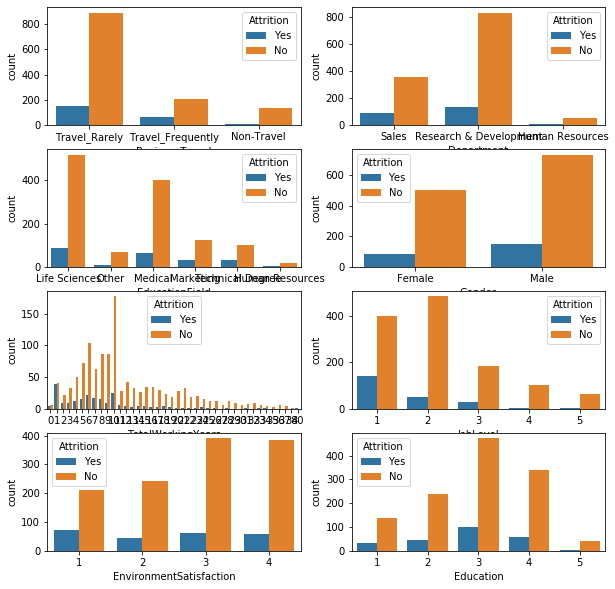

In [9]:
#univariate analysis
fig,axes=plt.subplots(figsize=(10,10),nrows=4,ncols=2)
sns.countplot(x='BusinessTravel',hue='Attrition',data=df,ax=axes[0][0])
sns.countplot(x='Department',hue='Attrition',data=df,ax=axes[0][1])
sns.countplot(x='EducationField',hue='Attrition',data=df,ax=axes[1][0])
sns.countplot(x='Gender',hue='Attrition',data=df,ax=axes[1][1])
sns.countplot(x='TotalWorkingYears',hue='Attrition',data=df,ax=axes[2][0])
sns.countplot(x='JobLevel',hue='Attrition',data=df,ax=axes[2][1])
sns.countplot(x='EnvironmentSatisfaction',hue='Attrition',data=df,ax=axes[3][0])
sns.countplot(x='Education',hue='Attrition',data=df,ax=axes[3][1])
plt.show()

In [10]:
df['Gender'].value_counts()

Male      882
Female    588
Name: Gender, dtype: int64

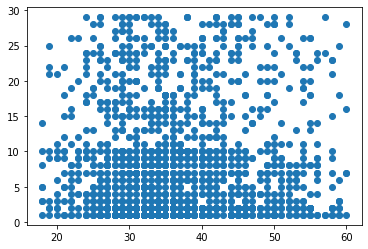

In [11]:
plt.scatter(x='Age',y='DistanceFromHome',data=df)

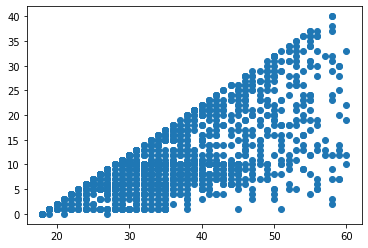

In [12]:
plt.scatter(x='Age',y='TotalWorkingYears',data=df)

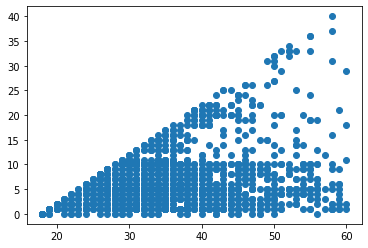

In [13]:
plt.scatter(x='Age',y='YearsAtCompany',data=df)

Text(0.5, 1.0, 'Total Working Years Vs Daily Rate')

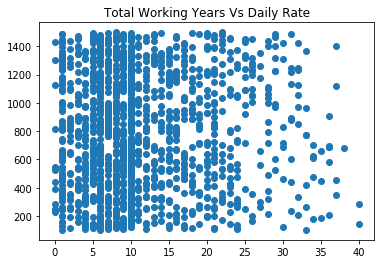

In [14]:
plt.scatter(x='TotalWorkingYears',y='DailyRate',data=df)
plt.title('Total Working Years Vs Daily Rate')

Text(0.5, 1.0, 'Working Years Vs Monthly Income')

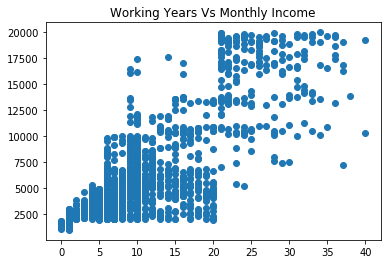

In [15]:
plt.scatter(x='TotalWorkingYears',y='MonthlyIncome',data=df)
plt.title('Working Years Vs Monthly Income')

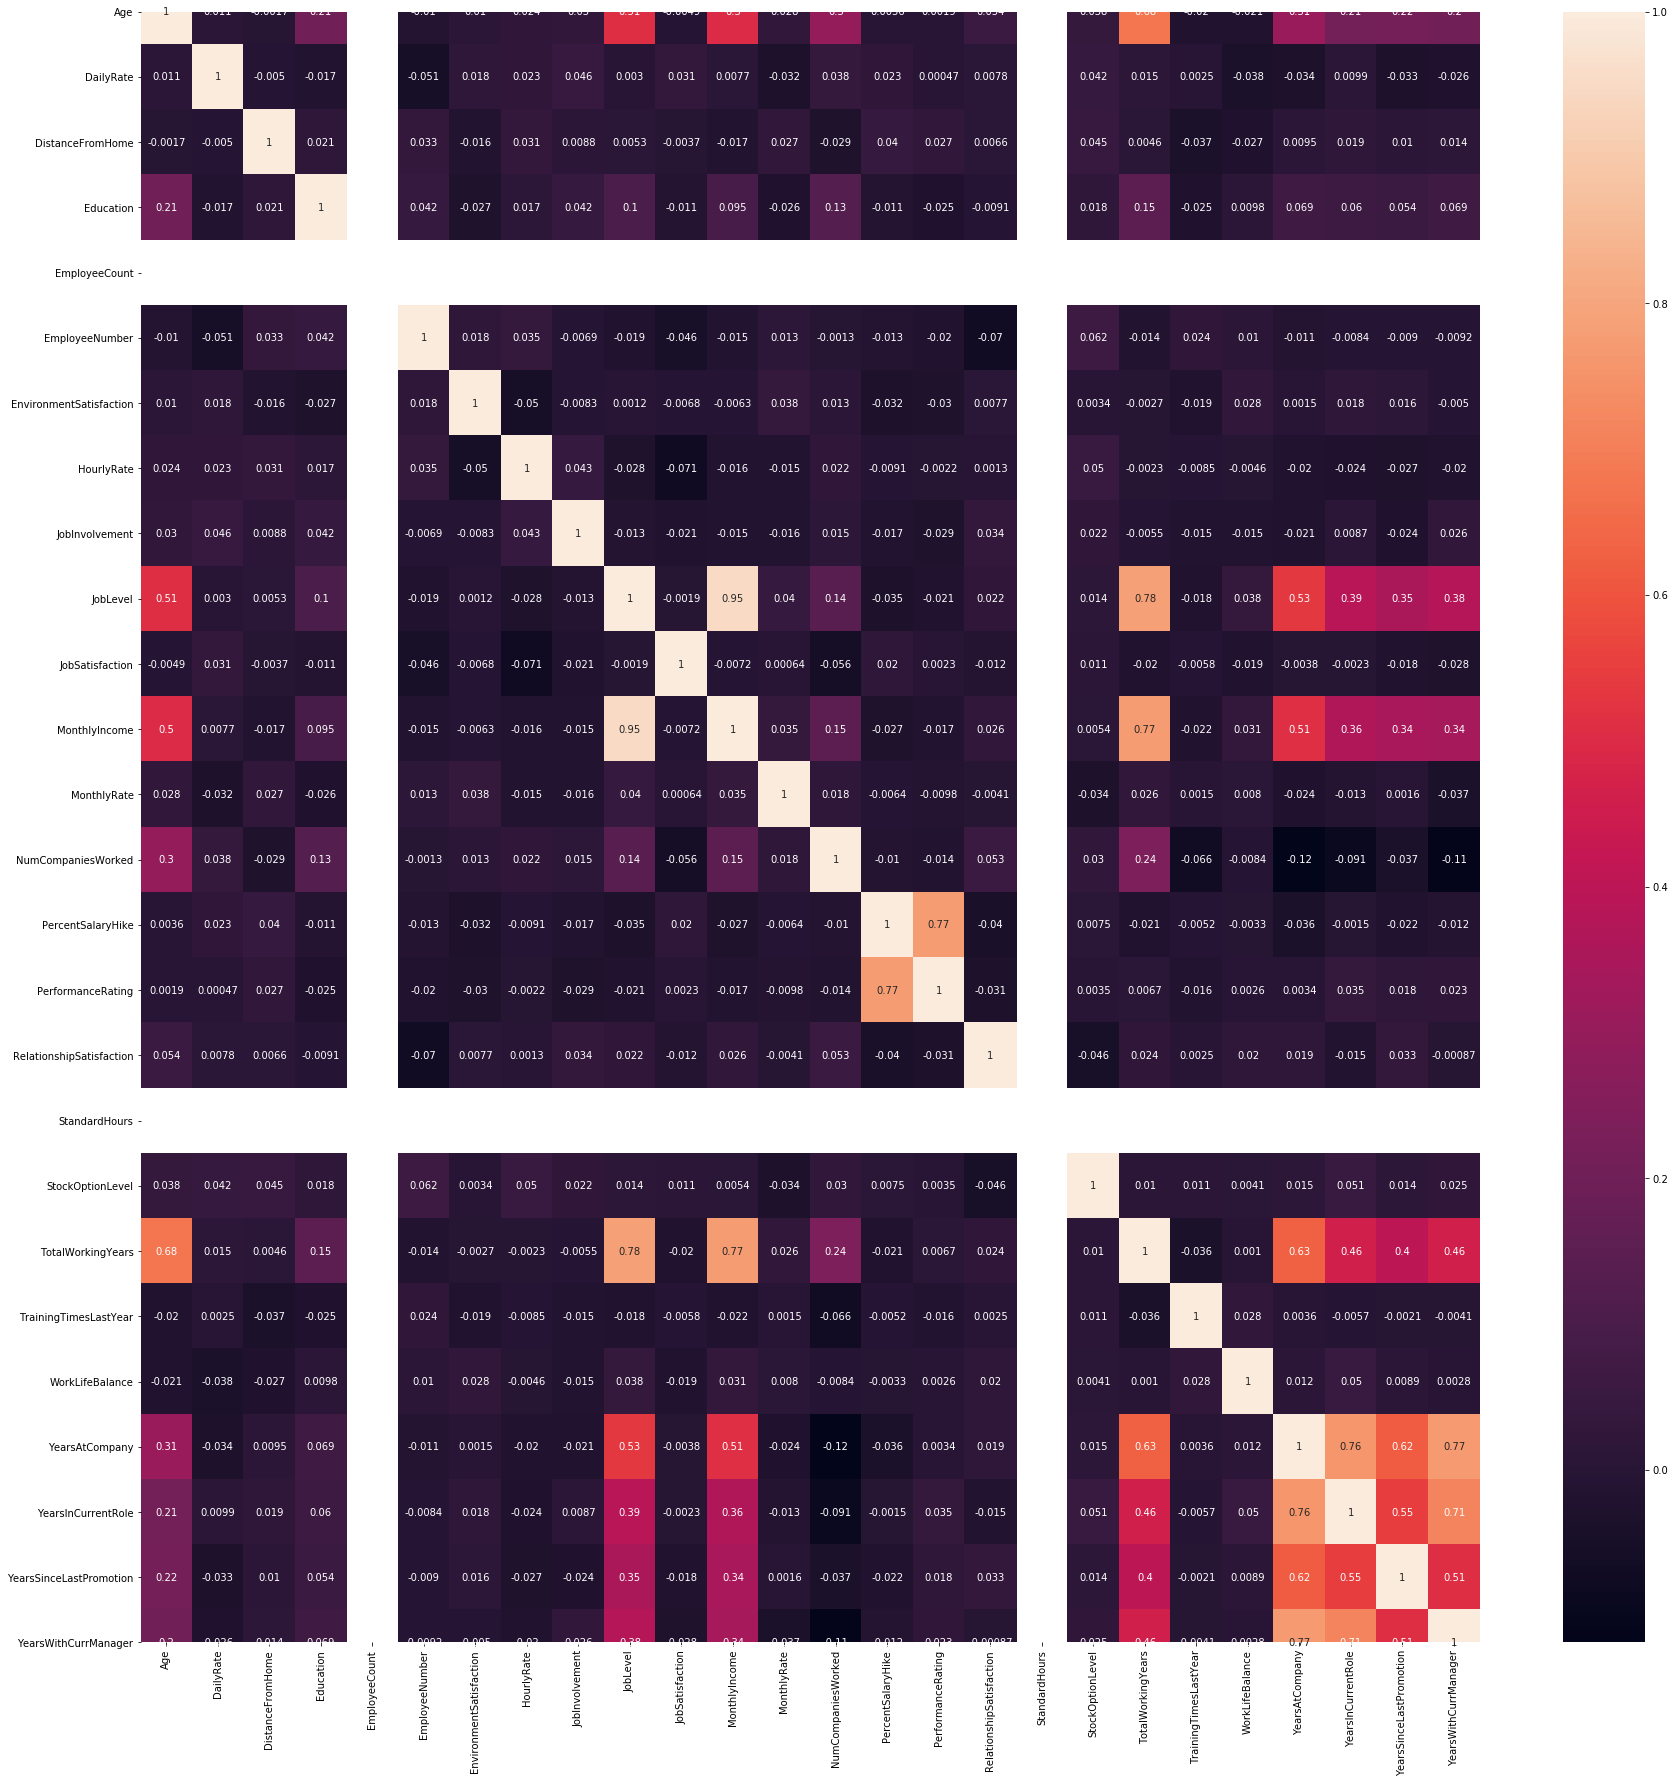

In [16]:
hmap=df.corr()
fig, ax = plt.subplots(figsize=(30,30))
sns.heatmap(hmap,ax=ax,annot=True)
plt.show()

In [17]:
#drooping the columns as they have no correlation and will not affect the data
df2=df.drop(['EmployeeNumber','EmployeeCount','Over18','StandardHours'],axis=1)

In [18]:
df2.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,2,Female,...,3,1,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,3,Male,...,4,4,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,4,Male,...,3,2,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,4,Female,...,3,3,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,Male,...,3,4,1,6,3,3,2,2,2,2


In [19]:
catcol = []
for column in df2.columns:
    if df2[column].dtype == object and len(df2[column].unique()) <= 50:
        catcol.append(column)
        print(f"{column} : {df[column].unique()}")
        print('\n')

Attrition : ['Yes' 'No']


BusinessTravel : ['Travel_Rarely' 'Travel_Frequently' 'Non-Travel']


Department : ['Sales' 'Research & Development' 'Human Resources']


EducationField : ['Life Sciences' 'Other' 'Medical' 'Marketing' 'Technical Degree'
 'Human Resources']


Gender : ['Female' 'Male']


JobRole : ['Sales Executive' 'Research Scientist' 'Laboratory Technician'
 'Manufacturing Director' 'Healthcare Representative' 'Manager'
 'Sales Representative' 'Research Director' 'Human Resources']


MaritalStatus : ['Single' 'Married' 'Divorced']


OverTime : ['Yes' 'No']




In [20]:
#classifying the categorical variable
catcol.remove("Attrition")
df2 = pd.get_dummies(df2, columns=catcol)


In [21]:
df2.shape

(1470, 52)

In [22]:
#classifying the targer variable using label encoder technique
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df2['Attrition']=le.fit_transform(df2['Attrition'])

In [23]:
df2.head()

,Age,Attrition,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,...,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,OverTime_No,OverTime_Yes
0,41,1,1102,1,2,2,94,3,2,4,...,0,0,0,1,0,0,0,1,0,1
1,49,0,279,8,1,3,61,2,2,2,...,0,0,1,0,0,0,1,0,1,0
2,37,1,1373,2,2,4,92,2,1,3,...,0,0,0,0,0,0,0,1,0,1
3,33,0,1392,3,4,4,56,3,1,3,...,0,0,1,0,0,0,1,0,0,1
4,27,0,591,2,1,1,40,3,1,2,...,0,0,0,0,0,0,1,0,1,0


In [24]:
y=df2.iloc[:,1:2]
y.head()

,Attrition
0,1
1,0
2,1
3,0
4,0


In [25]:
x=df2.drop(['Attrition'],axis=1)
x.head()

,Age,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,...,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,OverTime_No,OverTime_Yes
0,41,1102,1,2,2,94,3,2,4,5993,...,0,0,0,1,0,0,0,1,0,1
1,49,279,8,1,3,61,2,2,2,5130,...,0,0,1,0,0,0,1,0,1,0
2,37,1373,2,2,4,92,2,1,3,2090,...,0,0,0,0,0,0,0,1,0,1
3,33,1392,3,4,4,56,3,1,3,2909,...,0,0,1,0,0,0,1,0,0,1
4,27,591,2,1,1,40,3,1,2,3468,...,0,0,0,0,0,0,1,0,1,0


In [26]:
max_ascore=0
for r_state in range(42,101):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=r_state)
    lr=LogisticRegression()
    lr.fit(x_train,y_train)
    pred=lr.predict(x_test)
    a_scr=accuracy_score(y_test,pred)
    print("accuracy_score corresponding to random state:",r_state,"is:",a_scr)
    if a_scr>max_ascore:
        max_ascore=a_scr
        final_r_state=r_state
print()
print("max accuracy score corresponding to r_state is",final_r_state,"is:",max_ascore)

accuracy_score corresponding to random state: 42 is: 0.8684807256235828
accuracy_score corresponding to random state: 43 is: 0.854875283446712
accuracy_score corresponding to random state: 44 is: 0.8820861678004536
accuracy_score corresponding to random state: 45 is: 0.873015873015873
accuracy_score corresponding to random state: 46 is: 0.8684807256235828
accuracy_score corresponding to random state: 47 is: 0.8888888888888888
accuracy_score corresponding to random state: 48 is: 0.8707482993197279
accuracy_score corresponding to random state: 49 is: 0.8752834467120182
accuracy_score corresponding to random state: 50 is: 0.873015873015873
accuracy_score corresponding to random state: 51 is: 0.8798185941043084
accuracy_score corresponding to random state: 52 is: 0.8775510204081632
accuracy_score corresponding to random state: 53 is: 0.873015873015873
accuracy_score corresponding to random state: 54 is: 0.8412698412698413
accuracy_score corresponding to random state: 55 is: 0.8730158730158

In [27]:
from sklearn.svm import SVC
model_new=SVC(kernel='rbf')
from sklearn.model_selection import GridSearchCV
Cs = [0.001, 0.01, 0.1, 1, 10]
gammas = [0.001, 0.01, 0.1, 1]
param_grid = {'C': Cs, 'gamma' : gammas}
grid_search = GridSearchCV(model_new, param_grid, cv=3)

In [28]:
grid_search.fit(x_train,y_train)

GridSearchCV(cv=3, error_score='raise-deprecating',
             estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='auto_deprecated', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='warn', n_jobs=None,
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10],
                         'gamma': [0.001, 0.01, 0.1, 1]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [29]:
grid_search.best_estimator_

SVC(C=0.001, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.001, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [30]:
from sklearn.metrics import f1_score
model_new = SVC(C=0.001, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.001, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)
model_new.fit(x_train, y_train) 

def evaluate(x, y, dataset):
    pred = model_new.predict(x)
    score = model_new.score(x, y)    
    f1_scr=f1_score(y,pred,average='weighted')
    print("The score is:",score)
    print("The F1 Score is:",f1_scr)

evaluate(x_train, y_train, 'training')
evaluate(x_test, y_test, 'test')

The score is: 0.8377065111758989
The F1 Score is: 0.7637260842238233
The score is: 0.8412698412698413
The F1 Score is: 0.7687465790914066


In [31]:
from sklearn.tree import DecisionTreeClassifier
dtc=DecisionTreeClassifier()
sample_split_range = list(range(2, 50))
param_grid1 = dict(min_samples_split=sample_split_range)
grid1_search=GridSearchCV(dtc, param_grid1, cv=10, scoring='accuracy')

In [32]:
grid1_search.fit(x_train,y_train)

GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=DecisionTreeClassifier(class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort=False, random_state=None,
                                              splitter='best'),
             iid='warn', n_jobs=None,
             param_grid={'min_samples_split': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11,
                                               12, 13, 1

In [33]:
grid1_search.best_estimator_

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=47,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [34]:
from sklearn.metrics import f1_score
dtc = DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=46,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')
dtc.fit(x_train, y_train) 

def evaluate(x, y, dataset):
    pred = dtc.predict(x)
    score = dtc.score(x, y)    
    f1_scr=f1_score(y,pred,average='weighted')
    print("The score is:",score)
    print("The F1 Score is:",f1_scr)

evaluate(x_train, y_train, 'training')
evaluate(x_test, y_test, 'test')

The score is: 0.8814382896015549
The F1 Score is: 0.8659421399961602
The score is: 0.8435374149659864
The F1 Score is: 0.8275917246307477


In [35]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score
rfc=RandomForestClassifier()
from sklearn.model_selection import GridSearchCV

params = {
    'max_depth': [5,10, 15, 20, 25, None],    
    'min_samples_leaf': [1, 2, 4, 6],
    'min_samples_split': [2, 5, 10, 20],
    'n_estimators': [25, 50, 100, 200]}

grid2_search = GridSearchCV(rfc, params, cv = 3)

In [36]:
grid2_search.fit(x_train, y_train)

GridSearchCV(cv=3, error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators='warn', n_jobs=None,
                                              oob_score=False,
                                              random_state=None, verbose=0,
                                              warm_start=False),
             iid

In [37]:
grid2_search.best_estimator_

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=25, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=25,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [38]:
rfc = RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=15, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=2, min_samples_split=5,
                       min_weight_fraction_leaf=0.0, n_estimators=50,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)
rfc.fit(x_train, y_train) 

def evaluate(x, y, dataset):
    pred = rfc.predict(x)
    score = rfc.score(x, y)    
    f1_scr=f1_score(y,pred,average='weighted')
    print("The score is:",score)
    print("The F1 Score is:",f1_scr)

evaluate(x_train, y_train, 'training')
evaluate(x_test, y_test, 'test')

The score is: 0.9640427599611273
The F1 Score is: 0.9621807442155343
The score is: 0.8571428571428571
The F1 Score is: 0.813185156143975


In [39]:
# Further check and found the random Forest classifier is giving the best results and hence considering the model

In [40]:
from sklearn.externals import joblib
joblib.dump(rfc,'HR_attrition_classification.pkl')

['HR_attrition_classification.pkl']